# Mulai

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
from shutil import copyfile
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
source_path = "/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML"

In [ ]:
source_path_monas = os.path.join(source_path, 'monumen nasional jakarta_converted_png')
source_path_gwk = os.path.join(source_path, 'garuda wisnu kencana_converted_png')
source_path_ampera = os.path.join(source_path, 'jembatan ampera_converted_png')
source_path_gadang = os.path.join(source_path, "jam_gadang_converted_png")
source_path_kotatua = os.path.join(source_path, 'museum_sejarah_converted_png')
source_path_ulundanu = os.path.join(source_path, 'ulun danu bratan temple_converted_png')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_monas))} images of Monas.")
print(f"There are {len(os.listdir(source_path_gwk))} images of GWK.")
print(f"There are {len(os.listdir(source_path_ampera))} images of Jembatan Ampera.")
print(f"There are {len(os.listdir(source_path_gadang))} images of Jam Gadang.")
print(f"There are {len(os.listdir(source_path_kotatua))} images of Kota Tua.")
print(f"There are {len(os.listdir(source_path_ulundanu))} images of Pura Ulun Danu.")



There are 345 images of Monas.
There are 283 images of GWK.
There are 296 images of Jembatan Ampera.
There are 341 images of Jam Gadang.
There are 185 images of Kota Tua.
There are 283 images of Pura Ulun Danu.


In [ ]:
labels = ["monas", "gwk", "ampera", "gadang", "kotatua", "ulundanu"]
ROOT_PATH = "/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING"

if os.path.exists(ROOT_PATH):
  shutil.rmtree(ROOT_PATH)

# Create new dirs
try:
  TRAINING_DIR = os.path.join(ROOT_PATH,'training')
  VALIDATION_DIR = os.path.join(ROOT_PATH,'validation')
  os.makedirs(ROOT_PATH)
  os.makedirs(os.path.join(ROOT_PATH, "training"))
  os.makedirs(os.path.join(ROOT_PATH, "validation"))
  for label in labels:
    os.makedirs(os.path.join(TRAINING_DIR, label))
    os.makedirs(os.path.join(VALIDATION_DIR, label))
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(ROOT_PATH):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/training
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/validation
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/training/monas
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/training/gwk
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/training/ampera
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/training/gadang
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/training/kotatua
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/training/ulundanu
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/validation/monas
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/validation/gwk
/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/_MODELLING/validation/ampera
/content/drive/MyDrive/Capstone Bangkit C23

In [ ]:
# grader-required-cell

# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """
  ### START CODE HERE
  source_path = os.listdir(SOURCE_DIR)

  # Shuflles the list
  sampling = random.sample(source_path,len(source_path))

  split_point_training = int(len(sampling)*SPLIT_SIZE)


  for index in range(len(sampling)):
    # if item is zero
    if os.path.getsize(os.path.join(SOURCE_DIR,source_path[index])) == 0 :
      print(f"{source_path[index]} is zero length, so ignoring")
    # if not zero  
    else:
      # If part of train
      if (index < split_point_training):
        copyfile( os.path.join(SOURCE_DIR, source_path[index]), os.path.join(TRAINING_DIR, source_path[index]))
      # if part of test
      if (index >= split_point_training):
        copyfile( os.path.join(SOURCE_DIR, source_path[index]), os.path.join(VALIDATION_DIR, source_path[index]))
  ### END CODE HERE

In [ ]:
# grader-required-cell

# Test your split_data function

TRAINING_DIR = os.path.join(ROOT_PATH,'training')
VALIDATION_DIR = os.path.join(ROOT_PATH,'validation')

TRAINING_MONAS_DIR = os.path.join(TRAINING_DIR, "monas")
VALIDATION_MONAS_DIR = os.path.join(VALIDATION_DIR, "monas")

TRAINING_GWK_DIR = os.path.join(TRAINING_DIR, "gwk")
VALIDATION_GWK_DIR = os.path.join(VALIDATION_DIR, "gwk")

TRAINING_AMPERA_DIR = os.path.join(TRAINING_DIR, "ampera")
VALIDATION_AMPERA_DIR = os.path.join(VALIDATION_DIR, "ampera")

TRAINING_GADANG_DIR = os.path.join(TRAINING_DIR, "gadang")
VALIDATION_GADANG_DIR = os.path.join(VALIDATION_DIR, "gadang")

TRAINING_KOTATUA_DIR = os.path.join(TRAINING_DIR, "kotatua")
VALIDATION_KOTATUA_DIR = os.path.join(VALIDATION_DIR, "kotatua")

TRAINING_ULUNDANU_DIR = os.path.join(TRAINING_DIR, "ulundanu")
VALIDATION_ULUNDANU_DIR = os.path.join(VALIDATION_DIR, "ulundanu")

LABEL_DIRS = [
  TRAINING_MONAS_DIR,
  VALIDATION_MONAS_DIR,
  TRAINING_GWK_DIR,
  VALIDATION_GWK_DIR,
  TRAINING_AMPERA_DIR,
  VALIDATION_AMPERA_DIR,
  TRAINING_GADANG_DIR,
  VALIDATION_GADANG_DIR,
  TRAINING_KOTATUA_DIR,
  VALIDATION_KOTATUA_DIR,
  TRAINING_ULUNDANU_DIR,
  VALIDATION_ULUNDANU_DIR,
]

for dir in LABEL_DIRS:
  if len(os.listdir(dir)) > 0:
    for file in os.scandir(dir):
      os.remove(file.path)

# Empty directories in case you run this cell multiple times

# for rootdir, dirs, files in os.walk(ROOT_PATH):
#   for subdir in dirs:
#     dir = os.path.join(rootdir, subdir)
#     if len(os.listdir(dir)) > 0:
#       for file in os.scandir(dir):
#         if os.path.isfile(file):
#           os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(source_path_monas, TRAINING_MONAS_DIR, VALIDATION_MONAS_DIR, split_size)
split_data(source_path_gwk, TRAINING_GWK_DIR, VALIDATION_GWK_DIR, split_size)
split_data(source_path_gadang, TRAINING_GADANG_DIR, VALIDATION_GADANG_DIR, split_size)
split_data(source_path_kotatua, TRAINING_KOTATUA_DIR, VALIDATION_KOTATUA_DIR, split_size)
split_data(source_path_ampera, TRAINING_AMPERA_DIR, VALIDATION_AMPERA_DIR, split_size)
split_data(source_path_ulundanu, TRAINING_ULUNDANU_DIR, VALIDATION_ULUNDANU_DIR, split_size)


In [ ]:

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original monas's directory has {len(os.listdir(source_path_monas))} images")
print(f"Original gwk's directory has {len(os.listdir(source_path_gwk))} images")
print(f"Original gadang's directory has {len(os.listdir(source_path_gadang))} images")
print(f"Original kotatua's directory has {len(os.listdir(source_path_kotatua))} images")
print(f"Original ampera's directory has {len(os.listdir(source_path_ampera))} images")
print(f"Original ulundanu's directory has {len(os.listdir(source_path_ulundanu))} images\n\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_MONAS_DIR))} images of monas for training")
print(f"There are {len(os.listdir(TRAINING_GWK_DIR))} images of gwk for training")
print(f"There are {len(os.listdir(TRAINING_GADANG_DIR))} images of gadang for training")
print(f"There are {len(os.listdir(TRAINING_KOTATUA_DIR))} images of kotatua for training")
print(f"There are {len(os.listdir(TRAINING_AMPERA_DIR))} images of ampera for training")
print(f"There are {len(os.listdir(TRAINING_ULUNDANU_DIR))} images of ulundanu for training")
print(f"There are {len(os.listdir(VALIDATION_MONAS_DIR))} images of monas for validation")
print(f"There are {len(os.listdir(VALIDATION_GWK_DIR))} images of gwk for validation")
print(f"There are {len(os.listdir(VALIDATION_GADANG_DIR))} images of gadang for validation")
print(f"There are {len(os.listdir(VALIDATION_KOTATUA_DIR))} images of kotatua for validation")
print(f"There are {len(os.listdir(VALIDATION_AMPERA_DIR))} images of ampera for validation")
print(f"There are {len(os.listdir(VALIDATION_ULUNDANU_DIR))} images of ulundanu for validation")

Original monas's directory has 345 images
Original gwk's directory has 283 images
Original gadang's directory has 341 images
Original kotatua's directory has 185 images
Original ampera's directory has 296 images
Original ulundanu's directory has 283 images


There are 310 images of monas for training
There are 254 images of gwk for training
There are 306 images of gadang for training
There are 166 images of kotatua for training
There are 266 images of ampera for training
There are 254 images of ulundanu for training
There are 35 images of monas for validation
There are 29 images of gwk for validation
There are 35 images of gadang for validation
There are 19 images of kotatua for validation
There are 30 images of ampera for validation
There are 29 images of ulundanu for validation


In [ ]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.05,
                                     zoom_range=0.4,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode="categorical",
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode="categorical",
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1556 images belonging to 6 classes.
Found 177 images belonging to 6 classes.


In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-06 13:26:49--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  22.2MB/s    in 4.3s    

2023-06-06 13:26:53 (19.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# ## This cell is for finding the learning_rate

# # Flatten the output layer to 1 dimension
# x = layers.Flatten()(last_output)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)     
# # Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(1024, activation='relu')(x)             
# # Add a final sigmoid layer for classification
# x = layers.Dense(256, activation='relu')(x)             
# # Add a final sigmoid layer for classification
# x = layers.Dense  (6, activation='softmax')(x)           

# # Append the dense network to the base model
# model_tune = Model(pre_trained_model.input, x) 

# # Set the learning rate scheduler
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-8 * 10**(epoch / 20))

# # Compile the Model to tune the learning rate
# model_tune.compile(optimizer=tf.keras.optimizers.Adam(),
#                 loss='categorical_crossentropy')

# # Train the model
# history = model_tune.fit(train_generator, epochs=100, verbose=1, callbacks=[lr_schedule])

# # Define the learning rate array
# lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# # Set the figure size
# plt.figure(figsize=(10, 6))

# # Set the grid
# plt.grid(True)

# # Plot the loss in log scale
# plt.semilogx(lrs, history.history["loss"])

# # Increase the tickmarks size
# plt.tick_params('both', length=10, width=1, which='both')

# # Set the plot boundaries
# plt.axis([1e-8, 1e-3, 0, 2])

In [ ]:
# for lr in range(len(history.history['lr'])):
#   if (history.history['loss'][lr] == min(history.history['loss'])):
#     print(history.history['lr'][lr])
#     print(history.history['loss'][lr])
  

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)     
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)             
# Add a final sigmoid layer for classification
x = layers.Dense(256, activation='relu')(x)             
# Add a final sigmoid layer for classification
x = layers.Dense  (6, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
# model.summary()

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data=validation_generator)

Epoch 1/100
156/156 [==============================] - 77s 406ms/step - loss: 1.1793 - accuracy: 0.5656 - val_loss: 0.3509 - val_accuracy: 0.8983
Epoch 2/100
156/156 [==============================] - 59s 378ms/step - loss: 0.7406 - accuracy: 0.7449 - val_loss: 0.2304 - val_accuracy: 0.9209
Epoch 3/100
156/156 [==============================] - 56s 358ms/step - loss: 0.6162 - accuracy: 0.7731 - val_loss: 0.1944 - val_accuracy: 0.9322
Epoch 4/100
156/156 [==============================] - 56s 361ms/step - loss: 0.5873 - accuracy: 0.7873 - val_loss: 0.1597 - val_accuracy: 0.9322
Epoch 5/100
156/156 [==============================] - 55s 355ms/step - loss: 0.5293 - accuracy: 0.8091 - val_loss: 0.1453 - val_accuracy: 0.9548
Epoch 6/100
156/156 [==============================] - 55s 356ms/step - loss: 0.4892 - accuracy: 0.8329 - val_loss: 0.1295 - val_accuracy: 0.9548
Epoch 7/100
156/156 [==============================] - 55s 356ms/step - loss: 0.4736 - accuracy: 0.8194 - val_loss: 0.1470 -

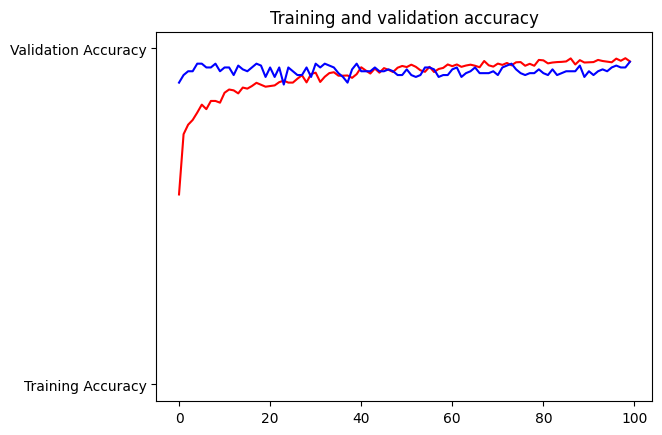

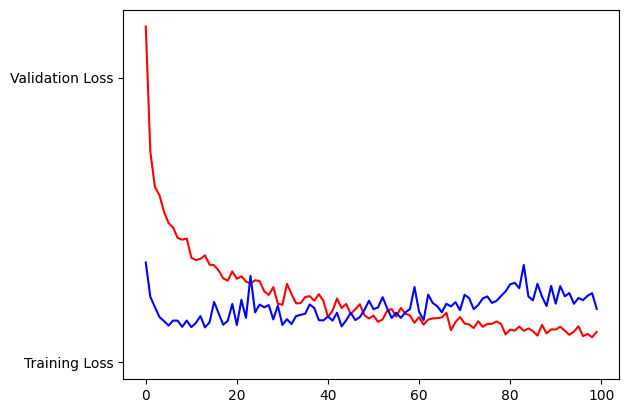

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

**Congratulations**

## Save model 

In [ ]:
# UNCOMMENT TO RUN THE THINGY

In [ ]:
model_path = "/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/model_transfer_learning.h5"
tf.saved_model.save(model, model_path)

## Import model and do prediction (ONLY NEED TO RUN THIS TO PREDICT) 

In [17]:
# Import model with the h5 format
from keras.models import load_model
import tensorflow as tf
import numpy as np

# CHANGE the model_path
model_path = "/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/model_transfer_learning.h5"
modelx = tf.saved_model.load(model_path)

In [8]:
from tensorflow.keras.preprocessing import image

# Importing image yang akan di prediksi
# Path imagenya bisa di sesuain
img = image.load_img('/content/drive/MyDrive/Capstone Bangkit C23-PS142/DATASET ML/DATA APA AJAH/'+'MONAS3.png', target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = x /255.

In [13]:
# Melakukan prediksi
prediction = modelx(x)

In [18]:
# Output prediksi
class_labels = ['ampera','gadang','gwk','kotatua','monas','ulundanu']
label = class_labels[np.argmax(prediction)]
print(f"Prediksi: {label} \ndengan tingkat Probabilitas: {np.max(prediction)}")

Prediksi: monas 
dengan tingkat Probabilitas: 0.9535914063453674
